In [1]:
import pandas as pd
import numpy as np

차원축소,클러스터링 학습예정

In [2]:
fileloc = '\data'

In [3]:
x = np.array([
    [[1,2,3],
     [3,4,5]],
              [[7,8,9],
               [11,12,13]],
                            [[5,7,8],
                             [2,3,4]]])
print(x.shape)
print(x.ndim)
print(type(x))

(3, 2, 3)
3
<class 'numpy.ndarray'>


In [4]:
x1 = np.array([[[[[1,2,4,3,5,3,3]],[[1,2,3,5,2,5,6]]]]])
print(x1.shape)
x1[0][0][0][0][3]

(1, 1, 2, 1, 7)


3

In [9]:

list1 = [1,2,3]
print()
ar1 = np.array(list1)
ar1 = ar1.astype('float64')
print(ar1)
ar1.dtype


[1. 2. 3.]


dtype('float64')

In [17]:
arr2  = np.zeros((3,3,4),dtype='int64')
print(arr2)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [21]:
arr3 = np.ones((3,2))
print(arr3.shape,arr3.dtype)
print(arr3)

(3, 2) float64
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [30]:
arr4 = arr3.reshape(2,-1,3)
arr4

array([[[1., 1., 1.]],

       [[1., 1., 1.]]])

In [35]:
ar1d = np.arange(1,10)
ar2d = ar1d.reshape(3,3)
ar5 = ar2d[[0,1],[2]]
ar5

array([3, 6])

13주차 조별발표: 비지도학습 적용사례 분석
1. 어느 분야에 적용되었는가?
2. 비지도학습이 적용되기 전 문제점(동기)은 무엇인가?
3. 어떤 방법론이 적용 되었는가(차원축소 or 클러스터링 but 수업시간에 배우지 않은 방법도 소개 가능함)
4. 추가적인 개선점,과제,아쉬운점이 있는가?
코딩하지 않아도 됨 소개만ppt로 7장 이내 10분 내외
점수는 기말프로젝트 점수의 절반 15~20점
5. matplotlib이나 seabon으로 시각화 하는것이 필요

In [37]:
titanic_df = pd.read_csv('titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df


titanic_df.describe()#통계적 특성 출력 matplotlib이나 seabon으로 시각화 하는것이 필요

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:

df = pd.read_excel('.\data\시도별 전출입 인구수.xlsx')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [43]:
df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [52]:
mask = (df['전출지별']=='서울특별시')& (df['전입지별'] !='서울특별시')
mask

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [55]:
df_seoul = df[mask]
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [58]:
df_seoul = df_seoul.drop('전출지별',axis=1)


KeyError: "['전출지별'] not found in axis"

In [59]:
df_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


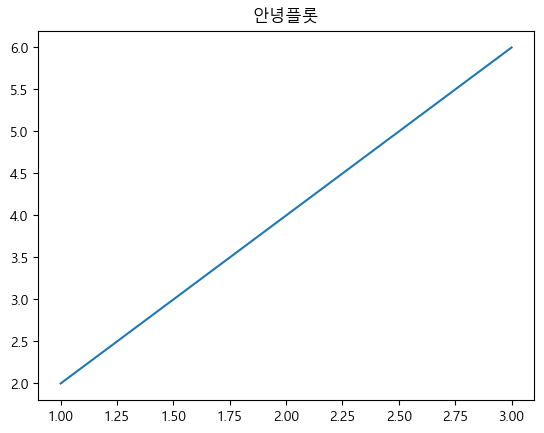

In [65]:
import matplotlib.pyplot as plt

# x좌표 입력값 [1, 2, 3], y좌표 입력값 [2, 4, 6]으로 선 그래프를 그립니다.
plt.plot([1, 2, 3], [2, 4, 6]) 

# 선그래프 타이틀을 Hello plot으로 설정. 
plt.title("안녕플롯") 

# 선 그래프를 출력
plt.show()


In [64]:
from matplotlib import font_manager,rc

font_path = "./data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family = font_name)

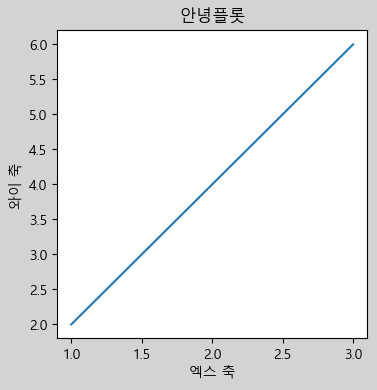

In [74]:
# x좌표 입력값 [1, 2, 3], y좌표 입력값 [2, 4, 6]으로 선 그래프를 그립니다.

plt.figure(figsize=(4,4),facecolor='LightGray')
plt.plot([1, 2, 3], [2, 4, 6]) 

# 선그래프 타이틀을 Hello plot으로 설정. 
plt.title("안녕플롯") 

# 선 그래프를 출력

plt.xlabel("엑스 축")
plt.ylabel("와이 축")

plt.show()

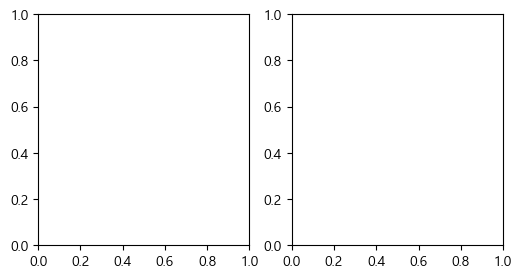

In [76]:
# 아래는 두개의 subplot, 즉 두개의 Axes를 생성하되 열 방향으로 두개를 배치함. 
# 또한 "전체 크기"가 가로 6, 세로 3인 Figure 생성. 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

(0.0, 8.0)

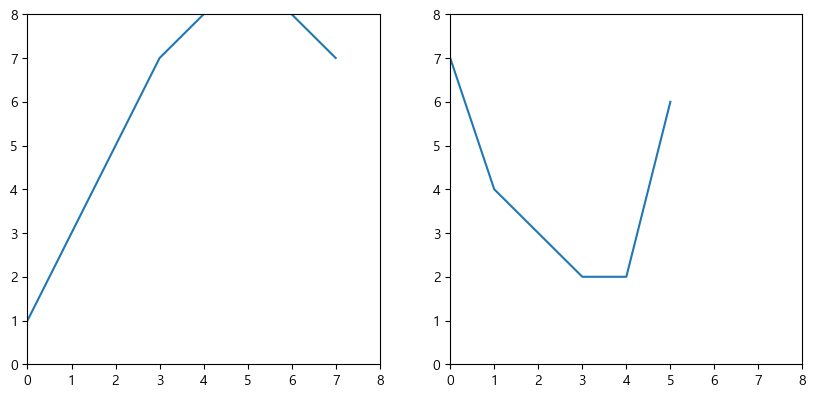

In [96]:
fig = plt.figure(figsize=(10,10) )
ax1 = fig.add_subplot(2,2,1)#(2개의 그림을 그릴껀데 ,한줄에 2개,맨 위에)
ax2 = fig.add_subplot(2,2,2)#2개의 그림을 그릴껀데 2번째 껀 여기에 그린다.

ax1.plot([1,3,5,7,8,10,8,7])
ax2.plot([7,4,3,2,2,6])


ax1.set_ylim(0,8)#y축 위치지정
ax2.set_ylim(0,8)#y축 위치지정

ax1.set_xlim(0,8)#y축 위치지정
ax2.set_xlim(0,8)#y축 위치지정